# Unit 5 - Financial Planning

In [19]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json 

%matplotlib inline

In [20]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [21]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [22]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [23]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_content = btc_data.json()
# print(json.dumps(btc_content,indent=4)) ## used to see the content of the data formatted in json

# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_content = eth_data.json()
# print(json.dumps(eth_content,indent=4)) ## used to see the content of the data formatted in json

# Compute current value of my crypto
my_btc_value = btc_content['data']['1']['quotes']['CAD']['price']
my_eth_value = eth_content['data']['1027']['quotes']['CAD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40425.40
The current value of your 5.3 ETH is $1516.75


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [24]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [25]:
# Set Alpaca API key and secret
alp_key = os.getenv("ALPACA_API_KEY")
alp_secret = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alp_key,
    alp_secret,
    api_version="v2"
)

In [26]:
# Format current date as ISO format
start =pd.Timestamp('2021-01-01', tz="America/New_York").isoformat()
end = pd.Timestamp('2021-01-17', tz="America/New_York").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = '1D'

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start,
    end=end
).df

# Preview DataFrame
df_ticker.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-01-04 00:00:00-05:00  118.08  118.1400  117.9850  118.040  6211938   
2021-01-05 00:00:00-05:00  118.06  118.0600  117.7500  117.915  5915389   
2021-01-06 00:00:00-05:00  117.90  117.9000  117.1500  117.360  8587136   
2021-01-07 00:00:00-05:00  117.13  117.2600  117.0667  117.210  4949593   
2021-01-08 00:00:00-05:00  117.18  117.3428  116.9800  117.090  5580443   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-01-04 00:00:00-05:00  375.31  375.45  364.82  368.85  92938087  
2021-01-05 00:00:00-05:00  368.10  372.50  368.05  371.32  53668865  
2021-01-06 00:00:00-05:00  369.71  376.98  369.12  373.53  91989131  
2021-01-07 00:00:00-05:00  376.10  379.90  375.91  379.06  58862006  
2021-01-08 00:00:00-05:00  380.59  381.49  377.10  381.24  60275466

In [27]:
# Creating empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

for stock in ticker:
    df_closing_prices[stock] = df_ticker[stock]['close']

# Drop time component of the date (index)
df_closing_prices.index = df_closing_prices.index.date

df_closing_prices

,AGG,SPY
2021-01-04,118.040,368.85
2021-01-05,117.915,371.32
2021-01-06,117.360,373.53
2021-01-07,117.210,379.06
2021-01-08,117.090,381.24
2021-01-11,116.890,378.74
2021-01-12,116.980,378.81
2021-01-13,117.360,379.76
2021-01-14,117.150,378.45
2021-01-15,117.260,375.68


In [28]:
# Pick AGG and SPY close prices
agg_close_price = df_closing_prices.iloc[0]['AGG']
spy_close_price = df_closing_prices.iloc[0]['SPY']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $118.04
Current SPY closing price: $368.85


In [29]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $23608.00
The current value of your 50 SPY shares is $18442.50


### Savings Health Analysis

In [30]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame

crypto = my_eth_value + my_btc_value
shares = my_agg_value + my_spy_value
df_savings = pd.DataFrame(index=['crypto','shares'],columns=['amount'])
df_savings['amount'] = crypto, shares

# Display savings DataFrame
display(df_savings)

,amount
crypto,41942.145752
shares,42050.500000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

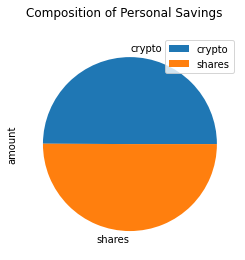

In [31]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True,title = 'Composition of Personal Savings')

In [32]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have saved enough money for your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations, you have reached your emergency fund goal.")
else:
    print(f"You are ${(emergency_fund-total_savings):0.2f} away from reaching your financial goal.")

Congratulations, you have saved enough money for your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG
spy_agg_5yrs = pd.DataFrame()

# Get current closing prices for SPY and AGG
mc_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Drop time component of the date (index)
mc_ticker.index = mc_ticker.index.date

# Display sample data
mc_ticker.head()

AGG                                         SPY          \
              open      high      low   close   volume    open    high   
2015-08-07  109.14  109.2750  109.035  109.21  2041167  208.16  208.34   
2015-08-10  109.15  109.1700  108.920  109.06  1149778  209.28  210.67   
2015-08-11  109.42  109.5765  109.284  109.42  1420907  208.98  209.47   
2015-08-12  109.55  109.7100  109.350  109.36  1468979  207.11  209.14   
2015-08-13  109.36  109.3651  109.110  109.15  1465173  208.73  209.55   

                                       
               low   close     volume  
2015-08-07  206.87  207.93   87669782  
2015-08-10  209.28  210.58   66755890  
2015-08-11  207.76  208.63   88424557  
2015-08-12  205.36  208.89  136171450  
2015-08-13  208.01  208.63   77197796

In [62]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim_30yr = MCSimulation(
    mc_ticker,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days= 30*252
)

# Print the simulation input data
mc_sim_30yr.portfolio_data.head()

AGG                                                      SPY  \
              open      high      low   close   volume daily_return    open   
2015-08-07  109.14  109.2750  109.035  109.21  2041167          NaN  208.16   
2015-08-10  109.15  109.1700  108.920  109.06  1149778    -0.001374  209.28   
2015-08-11  109.42  109.5765  109.284  109.42  1420907     0.003301  208.98   
2015-08-12  109.55  109.7100  109.350  109.36  1468979    -0.000548  207.11   
2015-08-13  109.36  109.3651  109.110  109.15  1465173    -0.001920  208.73   

                                                            
              high     low   close     volume daily_return  
2015-08-07  208.34  206.87  207.93   87669782          NaN  
2015-08-10  210.67  209.28  210.58   66755890     0.012745  
2015-08-11  209.47  207.76  208.63   88424557    -0.009260  
2015-08-12  209.14  205.36  208.89  136171450     0.001246  
2015-08-13  209.55  208.01  208.63   77197796    -0.001245

In [63]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001089,1.004722,0.991887,1.000024,1.006163,1.009316,1.006752,0.993931,0.998763,0.985963,...,0.996372,0.998706,1.005994,1.004455,0.999113,1.007801,0.996006,0.992731,1.010151,0.999298
2,1.007661,1.012399,0.999921,1.005798,1.002765,1.002398,1.009327,0.987992,1.001923,0.994837,...,0.997209,0.997718,1.005741,1.004162,0.999661,1.010513,1.003766,0.993612,1.004785,0.993740
3,1.001993,1.012839,0.996396,1.003537,1.004681,0.994890,1.008035,0.990612,1.006002,0.989010,...,0.995927,1.003869,1.007192,1.005329,0.989514,1.018279,1.006853,0.992307,0.995076,0.993337
4,1.006003,1.008356,1.000851,1.004407,1.008972,0.996924,1.009152,0.982002,1.013093,0.992275,...,0.988029,0.995566,1.017136,1.011184,0.981932,1.007931,1.013388,0.997549,0.995532,0.986446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.472076,22.047999,3.704651,14.596742,7.802172,12.215861,15.729244,10.364739,25.456686,5.712647,...,8.502130,4.598123,10.964733,2.920201,2.887573,9.628913,8.631515,7.409436,5.442497,9.442492
7557,11.420173,22.263057,3.720538,14.648436,7.848675,12.191060,15.803757,10.518262,25.263315,5.686652,...,8.530364,4.660089,11.017386,2.931648,2.878163,9.612269,8.589053,7.442476,5.440021,9.360227
7558,11.221761,22.057040,3.708997,14.464774,7.774492,12.152390,15.781773,10.540844,25.178997,5.684186,...,8.575436,4.696336,11.044156,2.920195,2.890038,9.479493,8.727181,7.432097,5.444939,9.214357
7559,11.304965,21.728195,3.698634,14.375972,7.730739,12.243575,15.819701,10.623076,25.523398,5.681717,...,8.641459,4.687350,10.959051,2.929753,2.884768,9.392719,8.728285,7.544271,5.480128,9.290523


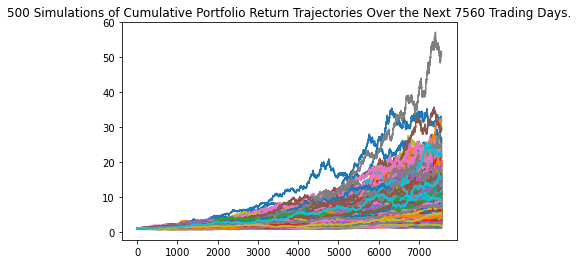

In [64]:
# Plot simulation outcomes
line_plot = mc_sim_30yr.plot_simulation()

line_plot.get_figure().savefig("MC_30year_sim_plot.png",bbox_inches='tight')

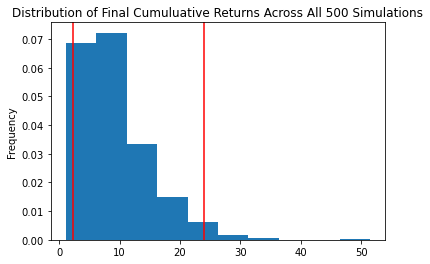

In [65]:
# Plot probability distribution and confidence intervals
dist_plot = mc_sim_30yr.plot_distribution()

dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_results_30yr = mc_sim_30yr.summarize_cumulative_return()

# Print summary statistics
sim_results_30yr

count           500.000000
mean              9.370374
std               5.955842
min               1.095276
25%               5.019376
50%               7.970000
75%              12.287032
max              51.504428
95% CI Lower      2.331479
95% CI Upper     24.024646
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [67]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sim_results_30yr[8]*20000,2)
ci_upper = round(sim_results_30yr[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $46629.59 and $480492.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [68]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sim_results_30yr[8]*30000,2)
ci_upper = round(sim_results_30yr[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $69944.38 and $720739.39


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [69]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
retire_5yr = MCSimulation(
    mc_ticker,
    weights=[.3,.7],
    num_simulation=500,
    num_trading_days= 5*252
)

# Print the simulation input data
retire_5yr.portfolio_data.head()

AGG                                                      SPY  \
              open      high      low   close   volume daily_return    open   
2015-08-07  109.14  109.2750  109.035  109.21  2041167          NaN  208.16   
2015-08-10  109.15  109.1700  108.920  109.06  1149778    -0.001374  209.28   
2015-08-11  109.42  109.5765  109.284  109.42  1420907     0.003301  208.98   
2015-08-12  109.55  109.7100  109.350  109.36  1468979    -0.000548  207.11   
2015-08-13  109.36  109.3651  109.110  109.15  1465173    -0.001920  208.73   

                                                            
              high     low   close     volume daily_return  
2015-08-07  208.34  206.87  207.93   87669782          NaN  
2015-08-10  210.67  209.28  210.58   66755890     0.012745  
2015-08-11  209.47  207.76  208.63   88424557    -0.009260  
2015-08-12  209.14  205.36  208.89  136171450     0.001246  
2015-08-13  209.55  208.01  208.63   77197796    -0.001245

In [70]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
retire_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998715,1.002599,0.998566,1.005330,0.999486,0.995771,0.992459,1.007018,0.999910,0.991117,...,1.014099,0.997509,0.992476,1.001397,1.000418,1.000499,1.013426,0.996995,1.010966,1.002970
2,0.997041,1.014840,1.006292,1.006894,0.986847,1.004834,0.995112,1.008313,1.002241,1.001402,...,1.001978,1.003864,0.983232,1.002817,0.998084,0.978239,0.994927,1.005435,0.999934,1.005801
3,0.996188,1.012828,1.012934,1.010622,0.986441,0.984490,0.992753,1.013086,0.989188,0.993920,...,0.994165,0.996441,0.977526,1.005413,1.000736,0.976603,1.001138,1.000632,1.001522,1.001944
4,0.982738,1.018170,1.010485,0.999171,0.980642,0.984900,0.983951,1.016224,0.991205,1.006428,...,0.996883,1.001221,0.995182,1.004135,0.996651,0.970238,0.997886,1.005087,1.011523,0.990843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.221787,1.921143,1.741005,1.228164,1.863237,2.617113,1.702743,1.044995,0.734780,1.432877,...,1.330696,1.038221,0.760594,2.200481,2.047792,1.128854,1.303659,1.538584,1.606509,1.736365
1257,1.215535,1.932579,1.735782,1.231526,1.884817,2.646964,1.733436,1.036892,0.737581,1.460104,...,1.330941,1.036828,0.756698,2.191764,2.069056,1.128074,1.312858,1.544430,1.628169,1.749525
1258,1.231087,1.950186,1.727217,1.220160,1.895722,2.622527,1.731795,1.029627,0.752634,1.461272,...,1.342100,1.027468,0.756826,2.189923,2.096889,1.119721,1.313639,1.537810,1.626292,1.761604
1259,1.237904,1.941486,1.738735,1.226224,1.900109,2.614238,1.720642,1.026675,0.751544,1.471447,...,1.359770,1.023297,0.757865,2.213470,2.111095,1.131049,1.308544,1.533030,1.635446,1.757117


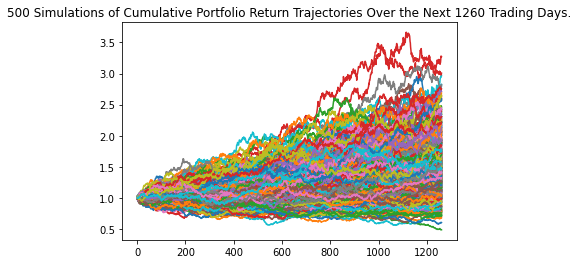

In [71]:
# Plot simulation outcomes
line_plot_5yr = retire_5yr.plot_simulation()

# Next line would be used to save the plot simulation as an image
# line_plot_5yr.get_figure().savefig("MC_agg_spy_fiveyear_sim_plot.png",bbox_inches='tight') 

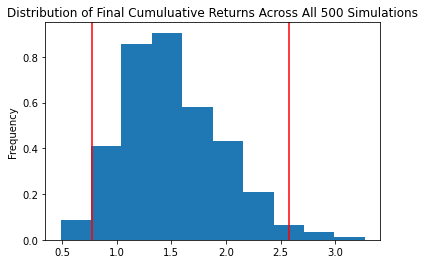

In [72]:
# Plot probability distribution and confidence intervals
dist_plot_5yr = retire_5yr.plot_distribution()

# Next line would be used to save the plot simulation as an image
# line_plot_5yr.get_figure().savefig("MC_agg_spy_5yr_dist.png",bbox='tight')

In [73]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_retire_5yr = retire_5yr.summarize_cumulative_return()

# Print summary statistics
sum_retire_5yr

count           500.000000
mean              1.514647
std               0.449947
min               0.486557
25%               1.204610
50%               1.466190
75%               1.769506
max               3.269939
95% CI Lower      0.774475
95% CI Upper      2.577104
Name: 1260, dtype: float64

In [74]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_retire_5yr[8]*60000,2)
ci_upper_five = round(sum_retire_5yr[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $46468.48 and $154626.25


### Ten Years Retirement Option

In [75]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
retire_10yr = MCSimulation(
    mc_ticker,
    weights=[0.3,0.7],
    num_simulation = 500,
    num_trading_days = 10*252
)

retire_10yr.portfolio_data.head()

AGG                                                      SPY  \
              open      high      low   close   volume daily_return    open   
2015-08-07  109.14  109.2750  109.035  109.21  2041167          NaN  208.16   
2015-08-10  109.15  109.1700  108.920  109.06  1149778    -0.001374  209.28   
2015-08-11  109.42  109.5765  109.284  109.42  1420907     0.003301  208.98   
2015-08-12  109.55  109.7100  109.350  109.36  1468979    -0.000548  207.11   
2015-08-13  109.36  109.3651  109.110  109.15  1465173    -0.001920  208.73   

                                                            
              high     low   close     volume daily_return  
2015-08-07  208.34  206.87  207.93   87669782          NaN  
2015-08-10  210.67  209.28  210.58   66755890     0.012745  
2015-08-11  209.47  207.76  208.63   88424557    -0.009260  
2015-08-12  209.14  205.36  208.89  136171450     0.001246  
2015-08-13  209.55  208.01  208.63   77197796    -0.001245

In [76]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
retire_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007118,1.018769,1.009020,1.006963,1.007115,1.008152,0.990238,0.998046,1.016541,1.008775,...,1.011353,1.001592,0.980339,0.987321,0.997941,0.988525,1.002273,1.003876,1.000826,1.006872
2,1.009114,1.015606,1.007809,1.004171,1.007427,1.007900,0.988765,0.997360,1.004191,1.013647,...,1.021846,0.992681,0.972490,0.978132,0.997057,0.980306,0.984737,1.006030,0.991601,1.006111
3,1.022951,1.018592,0.995715,1.004056,1.008862,1.003343,0.998453,0.995855,1.020973,1.016331,...,1.021290,1.000524,0.971899,0.977400,0.987580,0.983772,0.991316,0.990540,0.991531,1.010768
4,1.032783,1.014656,0.978564,0.997824,1.008419,1.012238,0.989527,0.990384,1.016051,1.013652,...,1.016625,1.002317,0.977566,0.981670,0.975469,0.986748,0.987741,1.000667,0.990815,1.019100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.657060,1.861117,2.347540,3.632415,2.939257,1.984496,2.064382,1.783270,1.044157,2.198593,...,2.301559,1.885076,2.884495,5.304153,1.775289,2.138419,1.796497,4.534513,3.795568,2.468155
2517,1.663263,1.894275,2.346888,3.651553,2.943671,2.001759,2.041258,1.807231,1.049472,2.217716,...,2.339726,1.860106,2.900315,5.383863,1.771814,2.124769,1.806456,4.555788,3.794992,2.441715
2518,1.636960,1.888690,2.336221,3.690695,2.951508,2.015400,2.029932,1.788385,1.064723,2.239572,...,2.354259,1.866285,2.932730,5.444516,1.784938,2.097161,1.822125,4.616812,3.782333,2.465836
2519,1.639562,1.891850,2.330623,3.672441,2.971290,2.008364,2.048298,1.793289,1.059695,2.239957,...,2.386653,1.898083,2.884720,5.485694,1.784910,2.100256,1.809826,4.664335,3.794524,2.457526


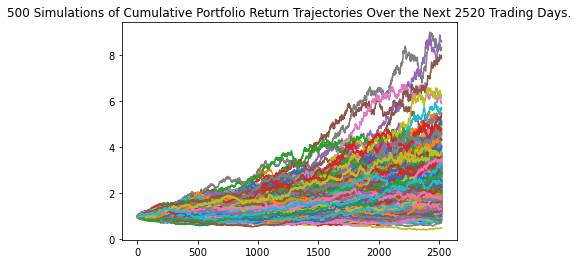

In [77]:
# Plot simulation outcomes
line_10yr = retire_10yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

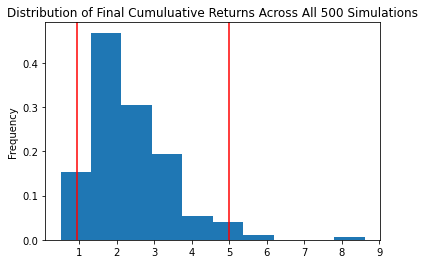

In [78]:
# Plot probability distribution and calc_cumulative_return
dist__plot_10yr = retire_10yr.plot_distribution()
dist__plot_10yr

In [ ]:
cum_returns_10yr = retire_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_retire_10yr = retire_10yr.summarize_cumulative_return()

# Print summary statistics
summ_retire_10yr

In [ ]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summ_retire_10yr[8]*60000,2) 
ci_upper_ten = round(summ_retire_10yr[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")